## Email Spam Detection using Machine Learning

Email spam detection is a type of project where we build an email spam detector which will detects email like spam mail or junk mail which contains frequentlly containing cryptic messages, scams or most dangerously, phishing content. We will make a model which will classify the mail into spam and non-spam.

Link to download the dataset:-

https://www.kaggle.com/datasets/uciml/sms-spam-collection-dataset

In [1]:
# Impotant libraries which we will use in this project:-

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
%matplotlib inline

In [2]:
# First we will load our dataset for that we will use read_csv

df = pd.read_csv("spam.csv", encoding='latin-1')
# This displays all the cokumns same for rows also if we specify rows
pd.set_option('display.max_columns', None)  

In [3]:
df

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN
...,...,...,...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...,NaN,NaN,NaN
5568,ham,Will Ì_ b going to esplanade fr home?,NaN,NaN,NaN
5569,ham,"Pity, * was in mood for that. So...any other s...",NaN,NaN,NaN
5570,ham,The guy did some bitching but I acted like i'd...,NaN,NaN,NaN


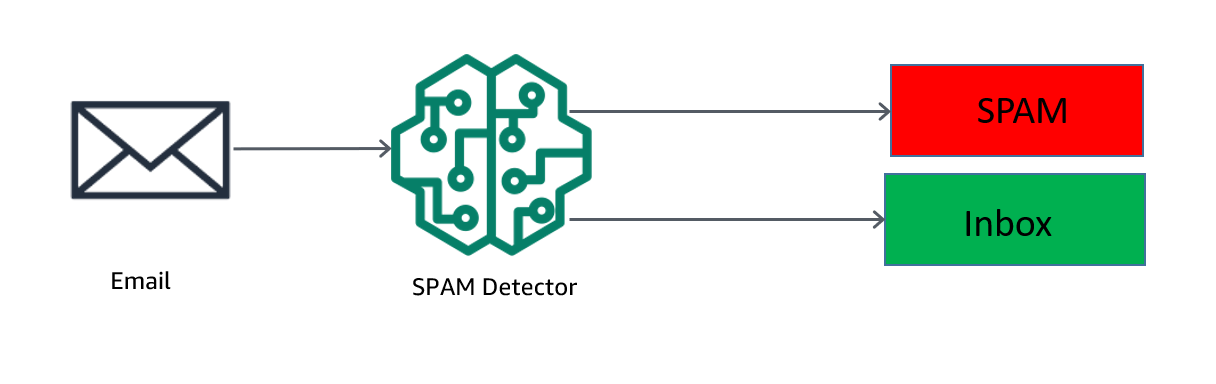

In [4]:
from IPython import display
display.Image("C:\\Users\\Malvika\\Downloads\\spam.png")

## Data Analysis

In [5]:
# head() will display the first 5 rows of the dataset
df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [6]:
# tail() will display the last 5 rows of the dataset
df.tail()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
5567,spam,This is the 2nd time we have tried 2 contact u...,NaN,NaN,NaN
5568,ham,Will Ì_ b going to esplanade fr home?,NaN,NaN,NaN
5569,ham,"Pity, * was in mood for that. So...any other s...",NaN,NaN,NaN
5570,ham,The guy did some bitching but I acted like i'd...,NaN,NaN,NaN
5571,ham,Rofl. Its true to its name,NaN,NaN,NaN


In [7]:
# To check the shape of our dataset

df.shape  # it has 147 rows and 5 columns

(5572, 5)

In [8]:
# To check the size of our dataset

df.size  # the total size

27860

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [10]:
df.describe()  # describe() provides statistical measures such as count, mean, standard deviation, minimum, quartiles, and maximum values for each numeric column in the DataFrame.

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
count,5572,5572,50,12,6
unique,2,5169,43,10,5
top,ham,"Sorry, I'll call later","bt not his girlfrnd... G o o d n i g h t . . .@""","MK17 92H. 450Ppw 16""","GNT:-)"""
freq,4825,30,3,2,2


In [11]:
df.isnull()  # this will check the null values in the dataset as here our data showing "True" that means it has null values 

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,False,False,True,True,True
1,False,False,True,True,True
2,False,False,True,True,True
3,False,False,True,True,True
4,False,False,True,True,True
...,...,...,...,...,...
5567,False,False,True,True,True
5568,False,False,True,True,True
5569,False,False,True,True,True
5570,False,False,True,True,True


In [12]:
df.isnull().sum()   # We can see that values are majorly null in the dataframe

v1               0
v2               0
Unnamed: 2    5522
Unnamed: 3    5560
Unnamed: 4    5566
dtype: int64

 Now as we can see in our dataset that column name Unnamed: 2, Unnamed: 3 and Unnamed: 4 are totally consists of Null values and we not need them so we can simply drop these columns

In [13]:
# To drop the unwanted columns

df.drop(columns=["Unnamed: 2", "Unnamed: 3", "Unnamed: 4"], axis=1, inplace=True)

In [14]:
df.head()

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [15]:
# Lets rename our columns name for better understanding

df.rename(columns={"v1":"Target", "v2":"Message"}, inplace=True)

In [16]:
df.head()

,Target,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [17]:
df.isnull().sum()

Target     0
Message    0
dtype: int64

now we don't have any null values in our dataset

In [18]:
# To check for duplicate values

duplicate_count = df.duplicated().sum()
print(duplicate_count) 

403


In [19]:
# As our dataset has 403 duplicates values so we need to drop them

df.drop_duplicates(keep="first", inplace=True)

In [20]:
df.duplicated().sum()

0

In [21]:
df.shape

(5169, 2)

In [22]:
# Lets convert all the dataset into one form to make it even

df["Message"] = df["Message"].str.lower()
df["Target"] = df["Target"].str.lower()

In [23]:
df.head()

,Target,Message
0,ham,"go until jurong point, crazy.. available only ..."
1,ham,ok lar... joking wif u oni...
2,spam,free entry in 2 a wkly comp to win fa cup fina...
3,ham,u dun say so early hor... u c already then say...
4,ham,"nah i don't think he goes to usf, he lives aro..."


In [24]:
# To view the column names in the dataset we will use 

df.columns

Index(['Target', 'Message'], dtype='object')

In [25]:
type(df) 

pandas.core.frame.DataFrame

In [26]:
# Count of Message column of the dataset

df["Target"].unique()
data=df["Target"].value_counts()
data

Target
ham     4516
spam     653
Name: count, dtype: int64

## Data Visualization 

As we can see our dataset has 4516 as ham and 653 as spam 

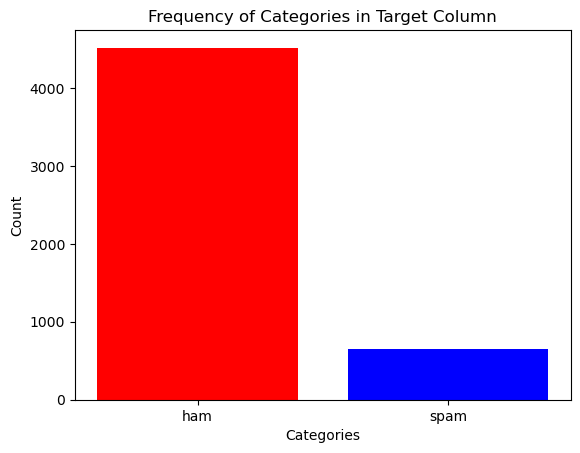

In [27]:
# Let's understand it more with the help of a graph

plt.bar(x=data.index, height=data.values, color=["red", "blue"])
# data.index contains the categories (x-axis labels)
# data.values contains the corresponding counts (bar heights)

plt.xlabel("Categories")
plt.ylabel("Count")
plt.title("Frequency of Categories in Target Column")

# Show the plot
plt.show()

In [28]:
# Lets convert Target values in more precise form 

df["Target"] = df["Target"].map({"spam": 0, "ham": 1})

In [29]:
df

,Target,Message
0,1,"go until jurong point, crazy.. available only ..."
1,1,ok lar... joking wif u oni...
2,0,free entry in 2 a wkly comp to win fa cup fina...
3,1,u dun say so early hor... u c already then say...
4,1,"nah i don't think he goes to usf, he lives aro..."
...,...,...
5567,0,this is the 2nd time we have tried 2 contact u...
5568,1,will ì_ b going to esplanade fr home?
5569,1,"pity, * was in mood for that. so...any other s..."
5570,1,the guy did some bitching but i acted like i'd...


In [30]:
df.isnull().sum()

Target     0
Message    0
dtype: int64

In [31]:
df["Target"].unique()
data1=df["Target"].value_counts()
data1

Target
1    4516
0     653
Name: count, dtype: int64

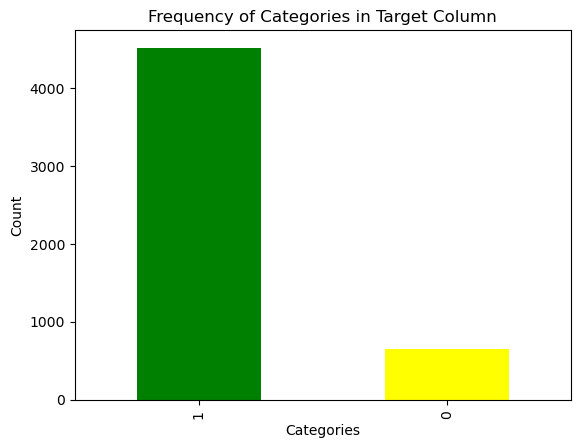

In [32]:
# Bar chart

df["Target"].value_counts().plot(kind="bar", color=["green", "yellow"])
plt.xlabel("Categories")
plt.ylabel("Count")
plt.title("Frequency of Categories in Target Column")

# Show the plot
plt.show()

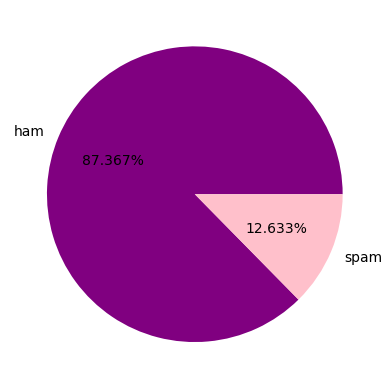

In [33]:
# Pie chart

plt.pie(df['Target'].value_counts(),labels=['ham','spam'],autopct='%0.3f%%', colors=["purple", "pink"])
plt.show()

In [34]:
# Currently as we can see data is imbalanced so let's balanced it first

In [35]:
import nltk

In [36]:
nltk.download("punkt")

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Malvika\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

This tokenizer divides a text into a list of sentences by using anunsupervised algorithm to build a model for abbreviation words, collocations, and words that start sentences. It must be trained on a large collection of plaintext in the target language before it can be used.

The "punkt" package is essential because it contains pre-trained tokenizers for various languages. Tokenization is the process of splitting text into individual words or sentences (known as tokens). The "punkt" tokenizer is capable of tokenizing text into sentences and words, and it is widely used for many natural language processing tasks.

### Fetch number of characters

In [37]:
df["num_chars"] = df["Message"].apply(len)

In [38]:
df["num_chars"]

0       111
1        29
2       155
3        49
4        61
       ... 
5567    161
5568     37
5569     57
5570    125
5571     26
Name: num_chars, Length: 5169, dtype: int64

### Fetch number of words

In [39]:
df["num_words"] = df["Message"].apply(lambda x:len(nltk.word_tokenize(x)))

In [40]:
df["num_words"]

0       24
1        8
2       36
3       13
4       15
        ..
5567    35
5568     9
5569    15
5570    27
5571     7
Name: num_words, Length: 5169, dtype: int64

NLTK function word_tokenize() is used to tokenize the text in each row of the 'Message' column (x). Tokenization is the process of splitting a text into individual words or tokens. 

The code snippet tokenizes the text in each row of the 'Message' column using nltk.word_tokenize() and then counts the number of words in each tokenized text. The results are stored in a new column named 'num_words' in the same DataFrame df. This new column will contain the count of words for each text in the original "Message" column.

### Fetch number of sentences

In [41]:
df["num_sentence"] = df["Message"].apply(lambda x:len(nltk.sent_tokenize(x)))

In [42]:
df["num_sentence"]

0       1
1       1
2       1
3       1
4       1
       ..
5567    4
5568    1
5569    2
5570    1
5571    2
Name: num_sentence, Length: 5169, dtype: int64

NLTK function sent_tokenize() is used to tokenize the text in each row of the 'Message' column (x). Tokenization is the process of splitting a text into individual sentences (sentence tokens). The sent_tokenize() function is part of the 'punkt' tokenizer in NLTK, which is capable of breaking a paragraph into sentences.

The code snippet tokenizes the text in each row of the 'Message' column using nltk.sent_tokenize() and then counts the number of sentences in each tokenized text. The results are stored in a new column named 'num_sentence' in the same DataFrame df. This new column will contain the count of sentences for each text in the original "Message" column.

In [43]:
# Now this is our new dataset after calculating above

df.head()

,Target,Message,num_chars,num_words,num_sentence
0,1,"go until jurong point, crazy.. available only ...",111,24,1
1,1,ok lar... joking wif u oni...,29,8,1
2,0,free entry in 2 a wkly comp to win fa cup fina...,155,36,1
3,1,u dun say so early hor... u c already then say...,49,13,1
4,1,"nah i don't think he goes to usf, he lives aro...",61,15,1


In [44]:
df[["num_chars", "num_words", "num_sentence"]].describe()

,num_chars,num_words,num_sentence
count,5169.000000,5169.000000,5169.000000
mean,78.977945,18.423486,1.863803
std,58.236293,13.286481,1.286399
min,2.000000,1.000000,1.000000
25%,36.000000,9.000000,1.000000
50%,60.000000,15.000000,1.000000
75%,117.000000,26.000000,2.000000
max,910.000000,216.000000,24.000000


In [45]:
df["num_chars_counts"] = pd.qcut(df["num_chars"], q=5, labels=["0-200", "200-400", "400-600", "600-800", "800+"])

# Use value_counts() to count the occurrences of each interval
interval_counts = df["num_chars_counts"].value_counts()

print(interval_counts)

num_chars_counts
0-200      1055
200-400    1040
600-800    1038
800+       1025
400-600    1011
Name: count, dtype: int64


In [46]:
df["num_words_counts"] = pd.qcut(df["num_words"], q=3, labels=["0-50", "50-100", "100+"])

# Use value_counts() to count the occurrences of each interval
interval_counts = df["num_words_counts"].value_counts()

print(interval_counts)

num_words_counts
0-50      1959
100+      1705
50-100    1505
Name: count, dtype: int64


In [47]:
bin_edges = [0, 5, float('inf')]

# Define the labels for the bins
labels = ["0-5", "5+"]

# Use pd.cut() to categorize the values of the "num_sentence" column into the specified bins
df["num_sentence_counts"] = pd.cut(df["num_sentence"], bins=bin_edges, labels=labels, right=False)

# Use value_counts() to count the occurrences of each interval
interval_counts = df["num_sentence_counts"].value_counts()

print(interval_counts)

num_sentence_counts
0-5    4941
5+      228
Name: count, dtype: int64


- float('inf') is used to represent positive infinity. In this specific case, we use it as the upper edge of the last bin to ensure that any value greater than the previous bin's upper edge will be included in the last bin.
- Setting right=False ensures that the right bin edge is not included in the interval.
- We use float('inf') as the upper edge of the last bin, so any value greater than 5 will fall into the "5+" bin. By setting right=False, we ensure that if the "num_sentence" value is exactly 5, it will be included in the "0-5" bin, not the "5+" bin.

## For Spam messages

In [48]:
df[df['Target']==0][['num_chars','num_words','num_sentence']].describe()

,num_chars,num_words,num_sentence
count,653.000000,653.000000,653.000000
mean,137.891271,27.539051,2.830015
std,30.137753,6.967305,1.419697
min,13.000000,2.000000,1.000000
25%,132.000000,25.000000,2.000000
50%,149.000000,29.000000,3.000000
75%,157.000000,32.000000,4.000000
max,224.000000,46.000000,8.000000


## For ham messages

In [49]:
df[df['Target']==1][['num_chars','num_words','num_sentence']].describe()

,num_chars,num_words,num_sentence
count,4516.000000,4516.000000,4516.000000
mean,70.459256,17.105403,1.724092
std,56.358207,13.464640,1.203559
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,52.000000,13.000000,1.000000
75%,90.000000,22.000000,2.000000
max,910.000000,216.000000,24.000000


<AxesSubplot:xlabel='num_chars', ylabel='Count'>

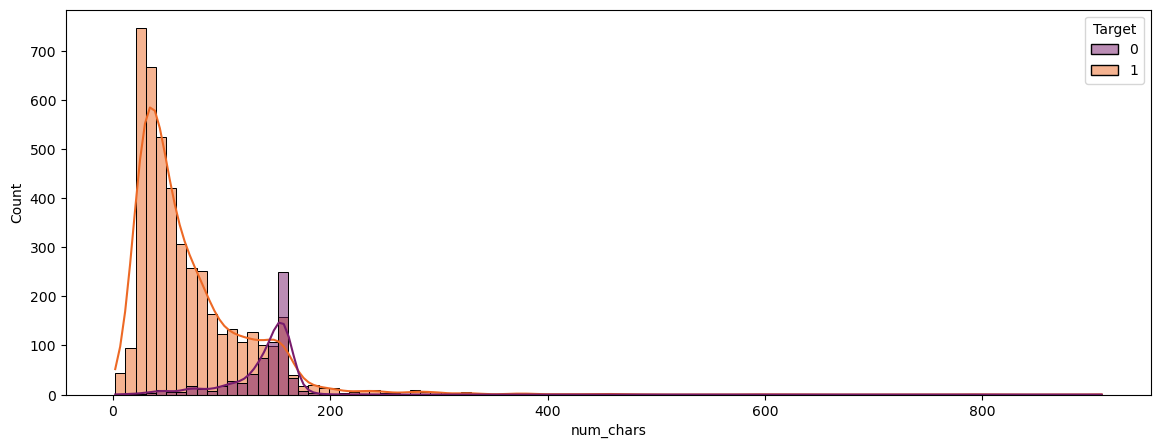

In [50]:
plt.figure(figsize=(14,5))
sns.histplot(data=df, x="num_chars", kde=True, palette="inferno", hue="Target")

On the basis of above image we can see the most of the characters of Message column classifies in 0 and 1 lies between 0 - 200 

<AxesSubplot:xlabel='num_words', ylabel='Count'>

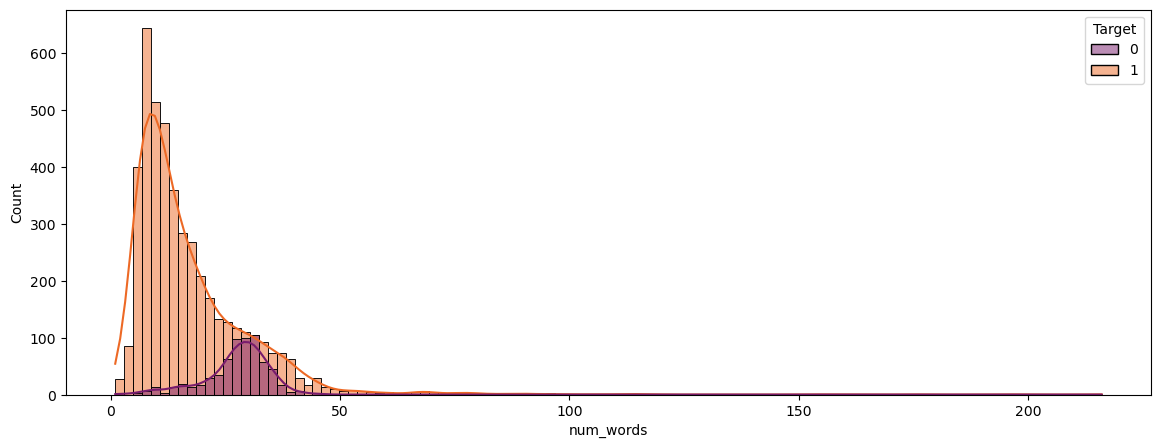

In [51]:
plt.figure(figsize=(14,5))
sns.histplot(data=df, x="num_words", kde=True, palette="inferno", hue="Target")

On the basis of above image we can see the most of the words of Message column classifies in 0 and 1 lies between 0 - 50

<AxesSubplot:xlabel='num_sentence', ylabel='Count'>

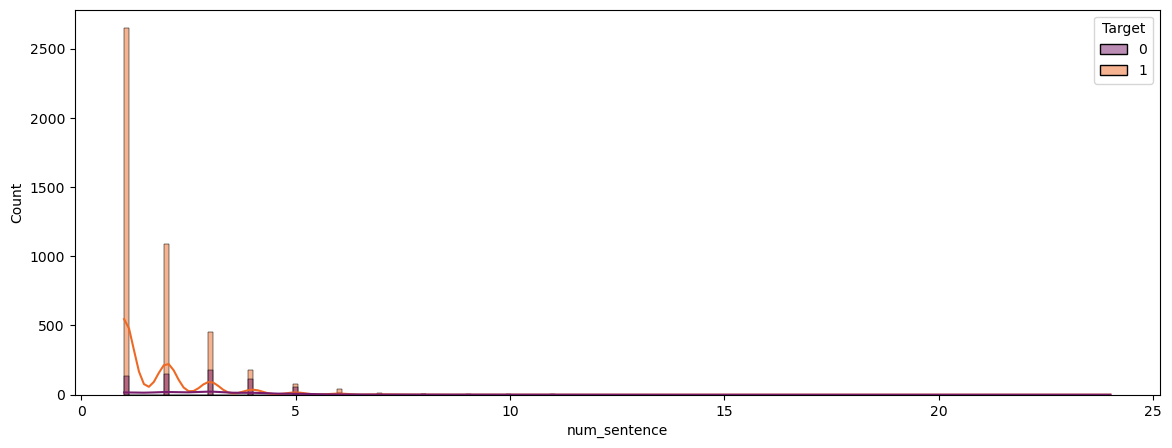

In [52]:
plt.figure(figsize=(14,5))
sns.histplot(data=df, x="num_sentence", kde=True, palette="inferno", hue="Target")

On the basis of above image we can see the most of the sentences of Message column classifies in 0 and 1 lies between 0 - 5

<Figure size 1400x500 with 0 Axes>

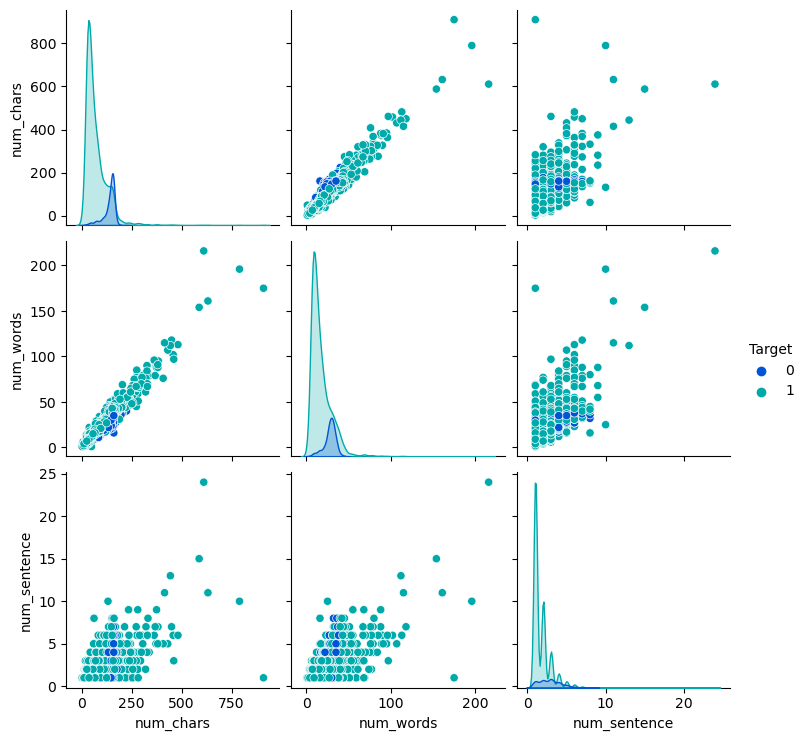

In [53]:
plt.figure(figsize=(14,5))
sns.pairplot(df,hue='Target',palette='winter');

In [54]:
df.head()

,Target,Message,num_chars,num_words,num_sentence,num_chars_counts,num_words_counts,num_sentence_counts
0,1,"go until jurong point, crazy.. available only ...",111,24,1,600-800,100+,0-5
1,1,ok lar... joking wif u oni...,29,8,1,0-200,0-50,0-5
2,0,free entry in 2 a wkly comp to win fa cup fina...,155,36,1,800+,100+,0-5
3,1,u dun say so early hor... u c already then say...,49,13,1,400-600,50-100,0-5
4,1,"nah i don't think he goes to usf, he lives aro...",61,15,1,400-600,50-100,0-5


In [55]:
# Lets drop the unwanted columns

df = df.drop(columns=(["num_chars_counts", "num_words_counts", "num_sentence_counts"]))

In [56]:
df

,Target,Message,num_chars,num_words,num_sentence
0,1,"go until jurong point, crazy.. available only ...",111,24,1
1,1,ok lar... joking wif u oni...,29,8,1
2,0,free entry in 2 a wkly comp to win fa cup fina...,155,36,1
3,1,u dun say so early hor... u c already then say...,49,13,1
4,1,"nah i don't think he goes to usf, he lives aro...",61,15,1
...,...,...,...,...,...
5567,0,this is the 2nd time we have tried 2 contact u...,161,35,4
5568,1,will ì_ b going to esplanade fr home?,37,9,1
5569,1,"pity, * was in mood for that. so...any other s...",57,15,2
5570,1,the guy did some bitching but i acted like i'd...,125,27,1


In [57]:
## Correlation

df1=df.copy()
df1 = df.drop("Message", axis=1)
df1.corr()

,Target,num_chars,num_words,num_sentence
Target,1.000000,-0.384717,-0.260913,-0.285640
num_chars,-0.384717,1.000000,0.965887,0.620743
num_words,-0.260913,0.965887,1.000000,0.660015
num_sentence,-0.285640,0.620743,0.660015,1.000000


In [58]:
df.head()

,Target,Message,num_chars,num_words,num_sentence
0,1,"go until jurong point, crazy.. available only ...",111,24,1
1,1,ok lar... joking wif u oni...,29,8,1
2,0,free entry in 2 a wkly comp to win fa cup fina...,155,36,1
3,1,u dun say so early hor... u c already then say...,49,13,1
4,1,"nah i don't think he goes to usf, he lives aro...",61,15,1


<AxesSubplot:>

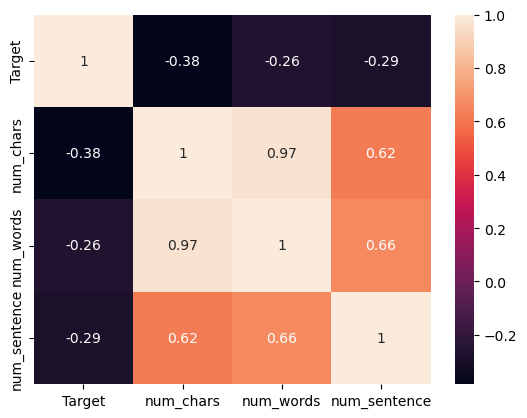

In [59]:
# Heatmap

sns.heatmap(df1.corr(), annot=True)

## NLP Data Preprocessing
- Lower case
- Tokenization
- Removing special characters
- Removing stop words and punctuation
- Stemming

NLP data preprocessing is a crucial step before feeding text data into machine learning models. It involves various tasks such as lowercasing, tokenization, removing special characters, stop words, and punctuation, and stemming.

In [60]:
# Some important libraries to import :-

from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer
import string

In [61]:
# Step 1: Lowercase the text

df["Lowercased_Text"] = df["Message"].str.lower()

In [62]:
df["Lowercased_Text"]

0       go until jurong point, crazy.. available only ...
1                           ok lar... joking wif u oni...
2       free entry in 2 a wkly comp to win fa cup fina...
3       u dun say so early hor... u c already then say...
4       nah i don't think he goes to usf, he lives aro...
                              ...                        
5567    this is the 2nd time we have tried 2 contact u...
5568                will ì_ b going to esplanade fr home?
5569    pity, * was in mood for that. so...any other s...
5570    the guy did some bitching but i acted like i'd...
5571                           rofl. its true to its name
Name: Lowercased_Text, Length: 5169, dtype: object

In [63]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Malvika\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [64]:
stop_words = set(stopwords.words('english'))
table = str.maketrans('', '', string.punctuation)

In [65]:
def Text_Transform(Message):
    PS = PorterStemmer()
    tokens = word_tokenize(Message)
    clean_tokens = [token.translate(table) for token in tokens if token.isalnum() and token not in stop_words]
    stemmed_tokens = [PS.stem(token) for token in clean_tokens]
    return " ".join(stemmed_tokens)

In [66]:
df["Transformed_Text"] = df["Lowercased_Text"].apply(Text_Transform)

In [67]:
#Testing with an example 
Text_Transform('It is Spamming spammed spam Detection! 20%%')


'it spam spam spam detect 20'

In [68]:
df['Message'][0]

'go until jurong point, crazy.. available only in bugis n great world la e buffet... cine there got amore wat...'

In [69]:
df.head()

,Target,Message,num_chars,num_words,num_sentence,Lowercased_Text,Transformed_Text
0,1,"go until jurong point, crazy.. available only ...",111,24,1,"go until jurong point, crazy.. available only ...",go jurong point crazi avail bugi n great world...
1,1,ok lar... joking wif u oni...,29,8,1,ok lar... joking wif u oni...,ok lar joke wif u oni
2,0,free entry in 2 a wkly comp to win fa cup fina...,155,36,1,free entry in 2 a wkly comp to win fa cup fina...,free entri 2 wkli comp win fa cup final tkt 21...
3,1,u dun say so early hor... u c already then say...,49,13,1,u dun say so early hor... u c already then say...,u dun say earli hor u c alreadi say
4,1,"nah i don't think he goes to usf, he lives aro...",61,15,1,"nah i don't think he goes to usf, he lives aro...",nah think goe usf live around though


In [70]:
df = df.drop("Lowercased_Text", axis=1)

In [71]:
df.head()

,Target,Message,num_chars,num_words,num_sentence,Transformed_Text
0,1,"go until jurong point, crazy.. available only ...",111,24,1,go jurong point crazi avail bugi n great world...
1,1,ok lar... joking wif u oni...,29,8,1,ok lar joke wif u oni
2,0,free entry in 2 a wkly comp to win fa cup fina...,155,36,1,free entri 2 wkli comp win fa cup final tkt 21...
3,1,u dun say so early hor... u c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,1,"nah i don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


In [72]:
from wordcloud import WordCloud

WordCloud library allows to create word clouds, which are visual representations of word frequency in a given text. Word clouds are a popular way to get a quick visual summary of the most frequent words in a document or dataset.

In [73]:
wc= WordCloud(width=900, height=400, min_font_size=10, background_color="black")

### Spam WorldCloud

In [74]:
spam_wordcloud = wc.generate(df[df["Target"]==0]["Transformed_Text"].str.cat(sep=" "))

Text(0.5, 1.0, 'Spam WorldCloud')

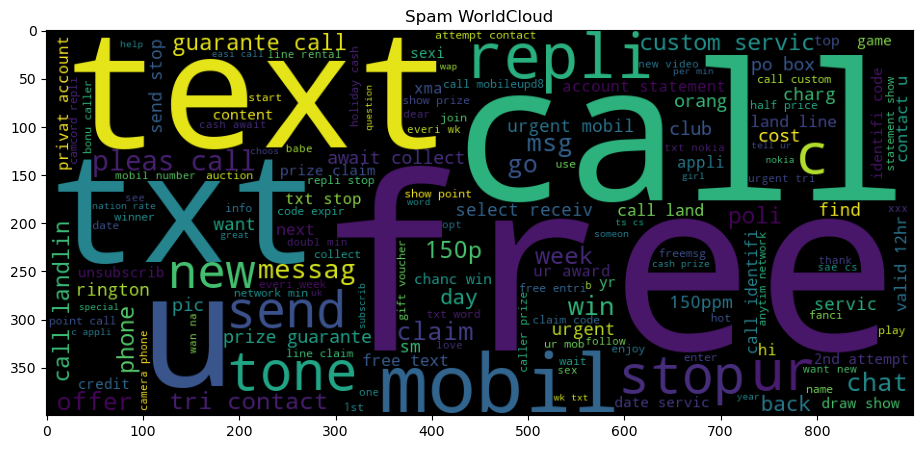

In [75]:
plt.figure(figsize=(14,5))
plt.imshow(spam_wordcloud)
plt.title("Spam WorldCloud")

### Ham WorldCloud

In [76]:
ham_wordcloud = wc.generate(df[df["Target"]==1]["Transformed_Text"].str.cat(sep=" "))

Text(0.5, 1.0, 'Ham WorldCloud')

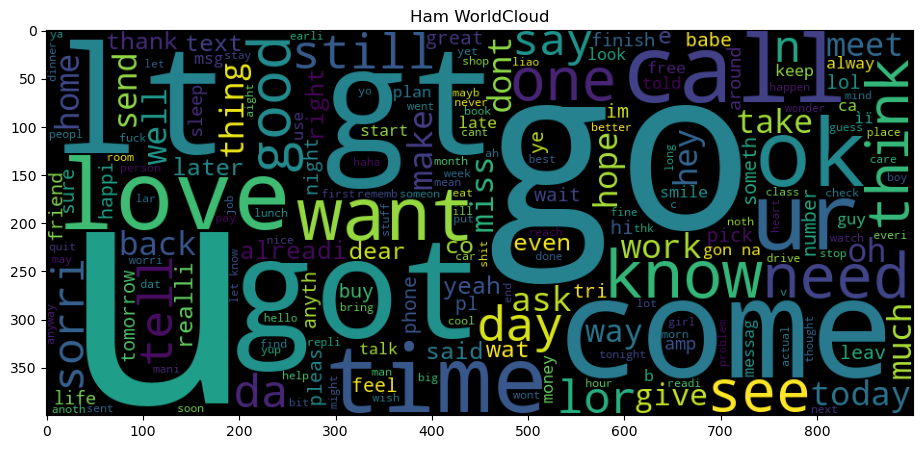

In [77]:
plt.figure(figsize=(14,5))
plt.imshow(ham_wordcloud)
plt.title("Ham WorldCloud")

## Top 30 spam messages

In [78]:
spam_messages = []
for msg in df[df["Target"]==0]["Transformed_Text"].tolist():
    for word in msg.split():
        spam_messages.append(word)

In [79]:
spam_messages

['free',
 'entri',
 '2',
 'wkli',
 'comp',
 'win',
 'fa',
 'cup',
 'final',
 'tkt',
 '21st',
 'may',
 'text',
 'fa',
 '87121',
 'receiv',
 'entri',
 'question',
 'std',
 'txt',
 'rate',
 'c',
 'appli',
 '08452810075over18',
 'freemsg',
 'hey',
 'darl',
 '3',
 'week',
 'word',
 'back',
 'like',
 'fun',
 'still',
 'tb',
 'ok',
 'xxx',
 'std',
 'chg',
 'send',
 'rcv',
 'winner',
 'valu',
 'network',
 'custom',
 'select',
 'receivea',
 'prize',
 'reward',
 'claim',
 'call',
 'claim',
 'code',
 'kl341',
 'valid',
 '12',
 'hour',
 'mobil',
 '11',
 'month',
 'u',
 'r',
 'entitl',
 'updat',
 'latest',
 'colour',
 'mobil',
 'camera',
 'free',
 'call',
 'mobil',
 'updat',
 'co',
 'free',
 '08002986030',
 'six',
 'chanc',
 'win',
 'cash',
 '100',
 'pound',
 'txt',
 'csh11',
 'send',
 'cost',
 '6day',
 'tsandc',
 'appli',
 'repli',
 'hl',
 '4',
 'info',
 'urgent',
 '1',
 'week',
 'free',
 'membership',
 'prize',
 'jackpot',
 'txt',
 'word',
 'claim',
 '81010',
 'c',
 'lccltd',
 'pobox',
 '4403ldnw

In [80]:
len(spam_messages)

9939

In [81]:
df.head()

,Target,Message,num_chars,num_words,num_sentence,Transformed_Text
0,1,"go until jurong point, crazy.. available only ...",111,24,1,go jurong point crazi avail bugi n great world...
1,1,ok lar... joking wif u oni...,29,8,1,ok lar joke wif u oni
2,0,free entry in 2 a wkly comp to win fa cup fina...,155,36,1,free entri 2 wkli comp win fa cup final tkt 21...
3,1,u dun say so early hor... u c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,1,"nah i don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


In [82]:
from collections import Counter

collections.Counter is a Python class in the collections module that is used to count the occurrences of elements in a list or any other iterable. It provides a convenient and efficient way to count the frequency of each element, and it returns a dictionary-like object where the elements are keys, and their counts are the corresponding values.

In [83]:
most_common_spam_messages = pd.DataFrame(Counter(spam_messages).most_common(30))

In [84]:
most_common_spam_messages

,0,1
0,call,320
1,free,191
2,2,155
3,txt,141
4,text,122
5,u,119
6,ur,119
7,mobil,114
8,stop,104
9,repli,103


In [85]:
most_common_spam_messages.columns = ["Words","Frequency"]

In [86]:
most_common_spam_messages.head()

,Words,Frequency
0,call,320
1,free,191
2,2,155
3,txt,141
4,text,122


Text(0.5, 1.0, 'Most Common Spam Words')

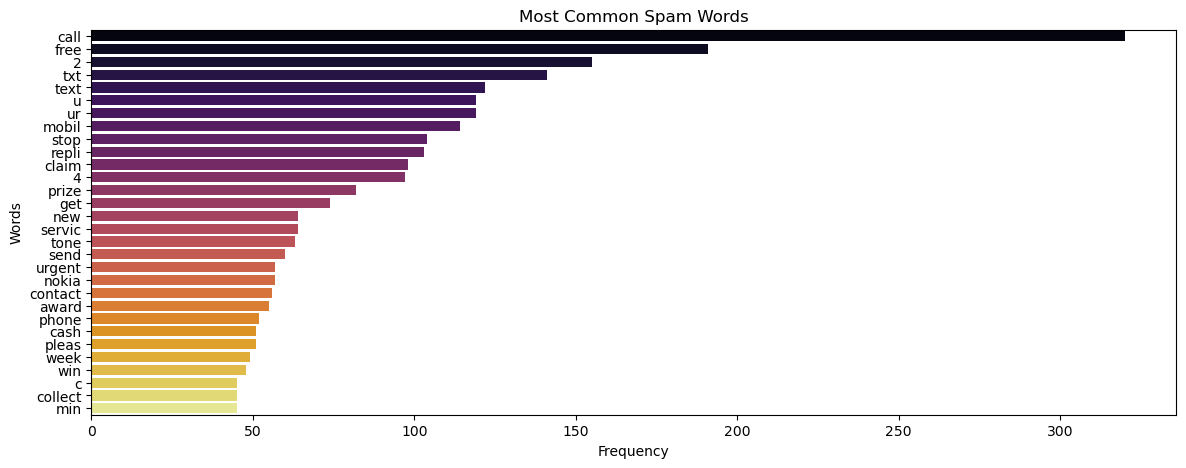

In [87]:
plt.figure(figsize=(14,5))
sns.barplot(data = most_common_spam_messages,y="Words",x="Frequency", palette = 'inferno');
plt.title("Most Common Spam Words")

## Top 30 ham messages

In [88]:
ham_messages = []
for msg in df[df["Target"]==1]["Transformed_Text"].tolist():
    for word in msg.split():
        ham_messages.append(word)

In [89]:
ham_messages

['go',
 'jurong',
 'point',
 'crazi',
 'avail',
 'bugi',
 'n',
 'great',
 'world',
 'la',
 'e',
 'buffet',
 'cine',
 'got',
 'amor',
 'wat',
 'ok',
 'lar',
 'joke',
 'wif',
 'u',
 'oni',
 'u',
 'dun',
 'say',
 'earli',
 'hor',
 'u',
 'c',
 'alreadi',
 'say',
 'nah',
 'think',
 'goe',
 'usf',
 'live',
 'around',
 'though',
 'even',
 'brother',
 'like',
 'speak',
 'treat',
 'like',
 'aid',
 'patent',
 'per',
 'request',
 'mell',
 'oru',
 'minnaminungint',
 'nurungu',
 'vettam',
 'set',
 'callertun',
 'caller',
 'press',
 '9',
 'copi',
 'friend',
 'callertun',
 'gon',
 'na',
 'home',
 'soon',
 'want',
 'talk',
 'stuff',
 'anymor',
 'tonight',
 'k',
 'cri',
 'enough',
 'today',
 'search',
 'right',
 'word',
 'thank',
 'breather',
 'promis',
 'wont',
 'take',
 'help',
 'grant',
 'fulfil',
 'promis',
 'wonder',
 'bless',
 'time',
 'date',
 'sunday',
 'oh',
 'k',
 'watch',
 'eh',
 'u',
 'rememb',
 '2',
 'spell',
 'name',
 'ye',
 'v',
 'naughti',
 'make',
 'v',
 'wet',
 'fine',
 'thatåõ',
 'wa

In [90]:
len(spam_messages)

9939

In [91]:
df.head()

,Target,Message,num_chars,num_words,num_sentence,Transformed_Text
0,1,"go until jurong point, crazy.. available only ...",111,24,1,go jurong point crazi avail bugi n great world...
1,1,ok lar... joking wif u oni...,29,8,1,ok lar joke wif u oni
2,0,free entry in 2 a wkly comp to win fa cup fina...,155,36,1,free entri 2 wkli comp win fa cup final tkt 21...
3,1,u dun say so early hor... u c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,1,"nah i don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


In [92]:
most_common_ham_messages = pd.DataFrame(Counter(ham_messages).most_common(30))

In [93]:
most_common_ham_messages

,0,1
0,u,883
1,go,404
2,get,349
3,gt,288
4,lt,287
5,2,284
6,come,275
7,got,236
8,know,236
9,like,234


In [94]:
most_common_ham_messages.columns = ["Words","Frequency"]

In [95]:
most_common_ham_messages.head()

,Words,Frequency
0,u,883
1,go,404
2,get,349
3,gt,288
4,lt,287


Text(0.5, 1.0, 'Most Common Ham Words')

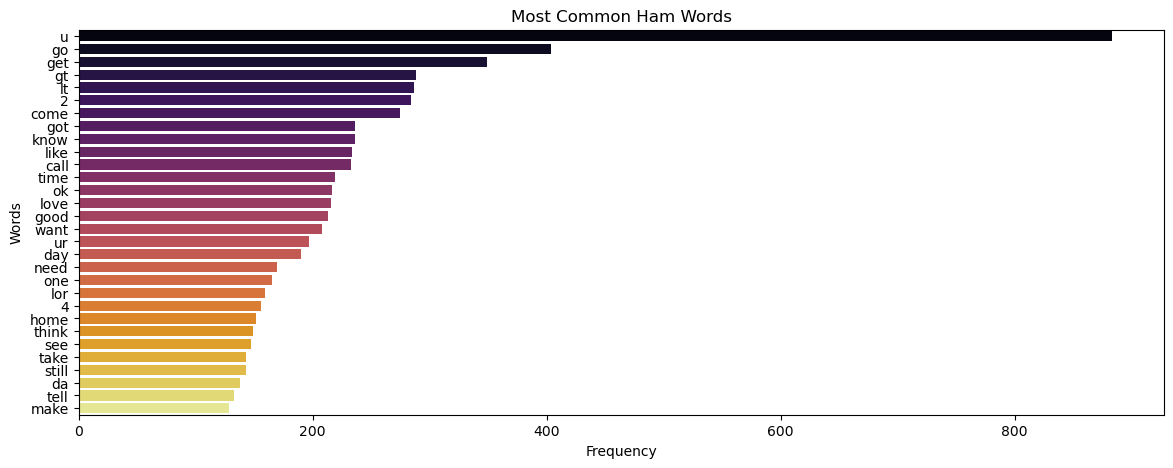

In [96]:
plt.figure(figsize=(14,5))
sns.barplot(data = most_common_ham_messages,y="Words",x="Frequency", palette = 'inferno');
plt.title("Most Common Ham Words")

Now are data is completely ready for model building

# Creating a Model

In [97]:
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer

CountVectorizer and TfidfVectorizer are two popular classes in scikit-learn used for text feature extraction and representation. They convert a collection of text documents into numerical feature vectors that can be used as input to machine learning algorithms.

In [98]:
CV = CountVectorizer()

In [99]:
CV

CountVectorizer()

In [100]:
tfidf = TfidfVectorizer(max_features=3000) # setting maz features as 3000 consider only this value counts and ignore the rest

In [101]:
tfidf

TfidfVectorizer(max_features=3000)

In [102]:
# It will transform the text data into an array

X = tfidf.fit_transform(df['Transformed_Text']).toarray()

In [103]:
X

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [104]:
X.shape

(5169, 3000)

In [105]:
Y = df['Target'].values
Y

array([1, 1, 0, ..., 1, 1, 1], dtype=int64)

In [106]:
from sklearn.model_selection import train_test_split

In [107]:
X_train, X_test, Y_train, Y_test = train_test_split(X ,Y , test_size=0.2,random_state=42)

In [108]:
from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB

These classifiers are:-
    
- GaussianNB: It is a Naive Bayes classifier that assumes that the features (independent variables) follow a Gaussian distribution (normal distribution).
 - It is commonly used for classification tasks where the features are continuous, such as in some natural language processing tasks when using numerical features.

- MultinomialNB: It is a Naive Bayes classifier that is suitable for discrete features with a multinomial (multiclass) distribution.
 - It is commonly used for text classification tasks when dealing with features representing word counts or term frequencies.
 - It's also used for tasks involving integer counts representing the number of times an event occurs in a fixed-size interval.

- BernoulliNB: It is a Naive Bayes classifier suitable for binary (two-class) classification tasks.
 - It is used when the features are binary (e.g., presence or absence of a feature) or represent boolean values.
 - It's commonly used in text classification tasks when dealing with binary feature representations like binary bag-of-words or TF-IDF matrices.

In [109]:
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, classification_report

### GaussianNB

In [110]:
gnb_model = GaussianNB()

In [111]:
gnb_model.fit(X_train, Y_train)

GaussianNB()

In [112]:
y_pred = gnb_model.predict(X_test)

In [113]:
# Evaluation using metrics
print("Gaussian Naive Bayes Accuracy:", accuracy_score(Y_test, y_pred))
print("Gaussian Naive Bayes Confusion Matrix:")
print(confusion_matrix(Y_test, y_pred))
print("Gaussian Naive Bayes Precision:", precision_score(Y_test, y_pred))

Gaussian Naive Bayes Accuracy: 0.8607350096711799
Gaussian Naive Bayes Confusion Matrix:
[[121  24]
 [120 769]]
Gaussian Naive Bayes Precision: 0.969735182849937


In [114]:
print("\n",classification_report(Y_test,y_pred))


               precision    recall  f1-score   support

           0       0.50      0.83      0.63       145
           1       0.97      0.87      0.91       889

    accuracy                           0.86      1034
   macro avg       0.74      0.85      0.77      1034
weighted avg       0.90      0.86      0.87      1034



### MultinomialNB

In [115]:
mnb_model = MultinomialNB()

In [116]:
mnb_model.fit(X_train, Y_train)

MultinomialNB()

In [117]:
y_pred = mnb_model.predict(X_test)

In [118]:
# Evaluation using metrics
print("MultinomialNB Naive Bayes Accuracy:", accuracy_score(Y_test, y_pred))
print("MultinomialNB Naive Bayes Confusion Matrix:")
print(confusion_matrix(Y_test, y_pred))
print("MultinomialNB Naive Bayes Precision:", precision_score(Y_test, y_pred))

MultinomialNB Naive Bayes Accuracy: 0.9729206963249516
MultinomialNB Naive Bayes Confusion Matrix:
[[118  27]
 [  1 888]]
MultinomialNB Naive Bayes Precision: 0.9704918032786886


In [119]:
print("\n",classification_report(Y_test,y_pred))


               precision    recall  f1-score   support

           0       0.99      0.81      0.89       145
           1       0.97      1.00      0.98       889

    accuracy                           0.97      1034
   macro avg       0.98      0.91      0.94      1034
weighted avg       0.97      0.97      0.97      1034



### BernoulliNB

In [120]:
bnb_model = BernoulliNB()

In [121]:
bnb_model.fit(X_train, Y_train)

BernoulliNB()

In [122]:
y_pred = bnb_model.predict(X_test)

In [123]:
# Evaluation using metrics
print("BernoulliNB Naive Bayes Accuracy:", accuracy_score(Y_test, y_pred))
print("BernoulliNB Naive Bayes Confusion Matrix:")
print(confusion_matrix(Y_test, y_pred))
print("BernoulliNB Naive Bayes Precision:", precision_score(Y_test, y_pred))

BernoulliNB Naive Bayes Accuracy: 0.9729206963249516
BernoulliNB Naive Bayes Confusion Matrix:
[[122  23]
 [  5 884]]
BernoulliNB Naive Bayes Precision: 0.9746416758544653


In [124]:
print("\n",classification_report(Y_test,y_pred))


               precision    recall  f1-score   support

           0       0.96      0.84      0.90       145
           1       0.97      0.99      0.98       889

    accuracy                           0.97      1034
   macro avg       0.97      0.92      0.94      1034
weighted avg       0.97      0.97      0.97      1034



# Final Conculsion 

- The GaussianNB model achieved a decent accuracy and high precision in classifying the Iris dataset, considering the continuous nature of the features.
- The Multinomial Naive Bayes model also performed exceptionally well on the Iris dataset, achieving high accuracy and precision.
- The BernoulliNB model performed remarkably well, achieving high accuracy and precision, especially considering the binary nature of the features.


Among the three Naive Bayes classifiers evaluated, the Multinomial Naive Bayes model stands out as the best performer, with the highest accuracy and precision on the Iris dataset.

In [125]:
# We can see we have achieve very good results from our model but let's try some of the other models as well

### Using different models

In [126]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier

In [127]:
svc = SVC(kernel='sigmoid', gamma=1.0)
knc = KNeighborsClassifier()
mnb = MultinomialNB()
dtc = DecisionTreeClassifier(max_depth=5)
lrc = LogisticRegression(solver='liblinear', penalty='l1')
rfc = RandomForestClassifier(n_estimators=50, random_state=2)
abc = AdaBoostClassifier(n_estimators=50, random_state=2)
bc = BaggingClassifier(n_estimators=50, random_state=2)
etc = ExtraTreesClassifier(n_estimators=50, random_state=2)
gbdt = GradientBoostingClassifier(n_estimators=50,random_state=2)
xgb = XGBClassifier(n_estimators=50,random_state=2)

In [128]:
clfs = {
    'SVC' : svc,
    'KN' : knc, 
    'NB': mnb, 
    'DT': dtc, 
    'LR': lrc, 
    'RF': rfc, 
    'AdaBoost': abc, 
    'BgC': bc, 
    'ETC': etc,
    'GBDT':gbdt,
    'xgb':xgb
}

In [129]:
def train_classifier(clf,X_train,Y_train,X_test,Y_test):
    clf.fit(X_train,Y_train)
    y_pred = clf.predict(X_test)
    accuracy = accuracy_score(Y_test,y_pred)
    precision = precision_score(Y_test,y_pred)
    
    return accuracy,precision

In [130]:
train_classifier(svc,X_train,Y_train,X_test,Y_test)

(0.97678916827853, 0.9800221975582686)

In [131]:
accuracy_scores = []
precision_scores = []

for name,clf in clfs.items():
    
    current_accuracy,current_precision = train_classifier(clf, X_train,Y_train,X_test,Y_test)
    
    print("For ",name)
    print("Accuracy - ",current_accuracy)
    print("Precision - ",current_precision)
    
    accuracy_scores.append(current_accuracy)
    precision_scores.append(current_precision)

For  SVC
Accuracy -  0.97678916827853
Precision -  0.9800221975582686
For  KN
Accuracy -  0.9100580270793037
Precision -  0.905295315682281
For  NB
Accuracy -  0.9729206963249516
Precision -  0.9704918032786886
For  DT
Accuracy -  0.9332688588007737
Precision -  0.9456521739130435
For  LR
Accuracy -  0.9468085106382979
Precision -  0.9572368421052632
For  RF
Accuracy -  0.9748549323017408
Precision -  0.973655323819978
For  AdaBoost
Accuracy -  0.9506769825918762
Precision -  0.9624724061810155
For  BgC
Accuracy -  0.9613152804642167
Precision -  0.9743016759776536
For  ETC
Accuracy -  0.97678916827853
Precision -  0.9768467475192943
For  GBDT
Accuracy -  0.9468085106382979
Precision -  0.9464668094218416
For  xgb
Accuracy -  0.9680851063829787
Precision -  0.9745011086474501


In [132]:
performance_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy':accuracy_scores,'Precision':precision_scores}).sort_values('Precision',ascending=False)
performance_df

,Algorithm,Accuracy,Precision
0,SVC,0.976789,0.980022
8,ETC,0.976789,0.976847
10,xgb,0.968085,0.974501
7,BgC,0.961315,0.974302
5,RF,0.974855,0.973655
2,NB,0.972921,0.970492
6,AdaBoost,0.950677,0.962472
4,LR,0.946809,0.957237
9,GBDT,0.946809,0.946467
3,DT,0.933269,0.945652


In [133]:
performance_df1 = pd.melt(performance_df, id_vars = "Algorithm")
performance_df1

,Algorithm,variable,value
0,SVC,Accuracy,0.976789
1,ETC,Accuracy,0.976789
2,xgb,Accuracy,0.968085
3,BgC,Accuracy,0.961315
4,RF,Accuracy,0.974855
5,NB,Accuracy,0.972921
6,AdaBoost,Accuracy,0.950677
7,LR,Accuracy,0.946809
8,GBDT,Accuracy,0.946809
9,DT,Accuracy,0.933269


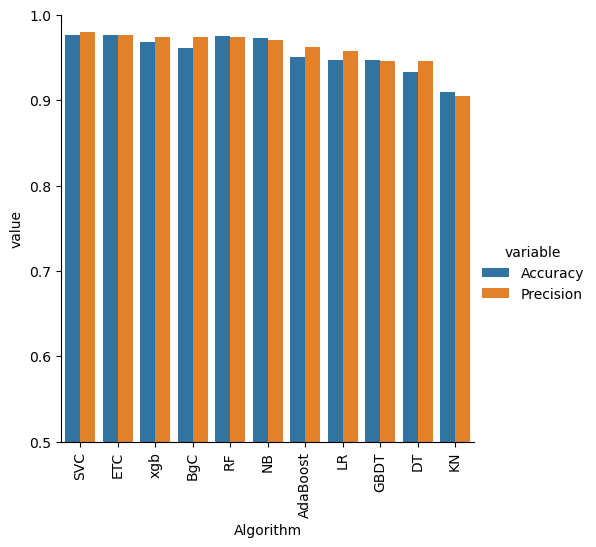

In [134]:
sns.catplot(x = 'Algorithm', y='value', 
               hue = 'variable',data=performance_df1, kind='bar',height=5)
plt.ylim(0.5,1.0)
plt.xticks(rotation='vertical')
plt.show()